# Extract npz files and generate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FlexibleWM import *

import time
from datetime import datetime
import ipdb


In [2]:
# Start the timer
start_time = time.time()

# Set the current time as 'name_simu' (e.g., formatted as Year-Month-Day_Hour-Minute-Second)
time_simu = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(f"Simulation start time: {time_simu}")

# sim_name = 'trials/{time_simu}'
sim_name = 'FindTuningCurve'

folder_path = f'./FlexibleWM/{sim_name}'

dictionnary={
    'name_simu':f'FlexibleWM/{sim_name}',
    'Number_of_trials':3,
    'num_stimuli_gird':5,
    'specific_load':True,
    'value_of_specific_load':2,  # number of items to remember. The specific location is random
    'compute_tuning_curve':False, # Reuse tuning curve
    'same_network_to_use':True
    # 'create_a_specific_network':True
    } # Add here any parameter you want to change from default. Defaults values are at the beginning of FlexibleWM.py
MyModel = FlexibleWM(dictionnary)
psth = MyModel.find_tuning_curve()
gcPython.collect() 

# End the timer
end_time = time.time()

# Calculate the total running time
total_time = end_time - start_time
print(f"Total running time: {total_time:.2f} seconds")

Simulation start time: 2024-09-25_17-09-27
Initializing the weights of the network that will be used for trial 1
Initializing the weights of the network that will be used for trial 0
Initializing the weights of the network that will be used for trial 2
All results saved in the folder
Total running time: 17.42 seconds


  cmap = plt.cm.get_cmap('hsv', 512)  # HSV colormap with 512 distinct colors

  plt.legend()



psth_all (3, 5, 512)
firing_rate (5, 512)


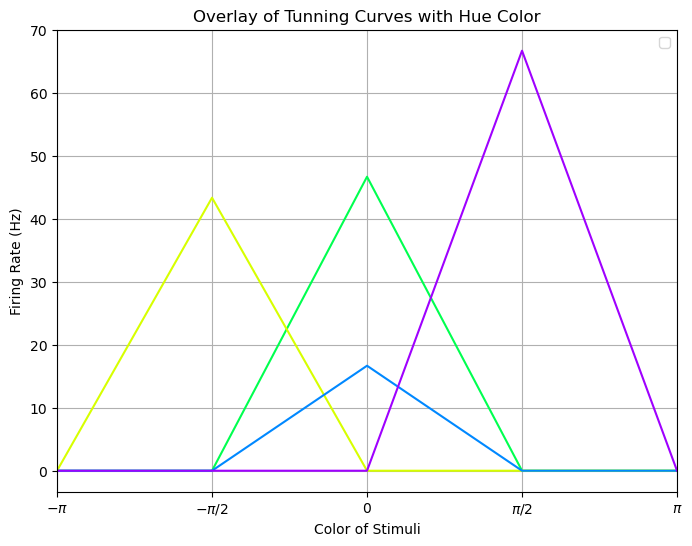

In [3]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_all = npzfile['psth_all']
stimuli_list = npzfile['stimuli_list']
npzfile.close()

print('psth_all',psth_all.shape)
firing_rate = np.average(psth_all,axis=0)/0.1 # Average over trials. Spike counts / 100ms
print('firing_rate',firing_rate.shape)

# Example plot with overlayed lines colored by their index
indices = [200, 100, 300, 400]  # Example indices for lines to plot
num_indices = len(indices)
color_axis = (stimuli_list/512-0.5)*2*np.pi
plt.figure(figsize=(8, 6))

# Create a colormap that maps index to color
cmap = plt.cm.get_cmap('hsv', 512)  # HSV colormap with 512 distinct colors

for idx in indices:
    color = cmap(idx / 512.0)  # Normalize index to [0,1] and get color
    plt.plot(color_axis,firing_rate[:, idx], color=color)

plt.legend()
plt.title('Overlay of Tunning Curves with Hue Color')
plt.xlabel('Color of Stimuli')
plt.ylabel('Firing Rate (Hz)')
plt.xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.grid(True)
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

In [4]:
# Load the .npz file
npzfile = np.load(f'{folder_path}/simulation_results.npz')

# List all the arrays stored in the .npz file
print("Array names:", npzfile.files)

# # Access individual arrays by their names
Matrix_all_results = npzfile['Matrix_all_results']
Matrix_abs_all = npzfile['Matrix_abs_all']
Matrix_angle_all = npzfile['Matrix_angle_all']
Results_ml_spikes = npzfile['Results_ml_spikes']
Drift_from_ml_spikes = npzfile['Drift_from_ml_spikes']
Matrix_initial_input = npzfile['Matrix_initial_input']
# array2 = npzfile['array_name2']
print('Matrix_all_results:',Matrix_all_results)
print('Matrix_abs_all:',Matrix_abs_all)
print('Matrix_angle_all:',Matrix_angle_all)
print('Results_ml_spikes:',Results_ml_spikes)
print('Drift_from_ml_spikes:',Drift_from_ml_spikes)
print('Matrix_initial_input:',Matrix_initial_input)


# plt.imshow(Matrix_all_results)
# Example: print one of the arrays
# print(array1)

# # Close the file after accessing the arrays
npzfile.close()

Array names: ['Matrix_all_results', 'Matrix_abs_all', 'Matrix_angle_all', 'Results_ml_spikes', 'Drift_from_ml_spikes', 'Matrix_initial_input']
Matrix_all_results: [[0.66666667 0.        ]]
Matrix_abs_all: [[ 7.06791123 10.46001379  9.79848013  0.55344955  8.90971724  0.64777346
   2.97896431  0.17071556]]
Matrix_angle_all: [[211.1602823  429.70871163 206.38382907 329.53678203  90.10114461
  397.95857194 439.13456378 247.44621502]]
Results_ml_spikes: [[216. 427. 205.   1.  98. 487. 453. 442.]]
Drift_from_ml_spikes: [[-0.28225246 -0.19634954  0.55223308 -0.92038847  0.06135923 -2.45436926
   2.39301003  1.06765063]]
Matrix_initial_input: [[239. 443. 160.  76.  93.  nan 258.  nan]]


In [5]:
from tqdm.auto import tqdm
import time

outer_iterations = 10
inner_iterations = [5, 10, 3, 7, 5, 10, 3, 7, 5, 10]  # Different sizes for each inner loop

for i in tqdm(range(outer_iterations), desc="Outer Loop"):
    inner_total = inner_iterations[i]  # Inner loop total changes with each iteration
    for j in tqdm(range(inner_total), desc="Inner Loop", leave=False):
        time.sleep(0.1)

Outer Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/7 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/7 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/5 [00:00<?, ?it/s]

Inner Loop:   0%|          | 0/10 [00:00<?, ?it/s]